In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [13]:
data_file = pd.read_csv("titanic.csv", sep='\t', engine='python')

In [14]:
data_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
#Deletar colunas irrelevantes
cols_to_drop = ['Name', 'Ticket', 'Cabin']
data_file = data_file.drop(cols_to_drop, axis=1)

In [16]:
data_file.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


<AxesSubplot:>

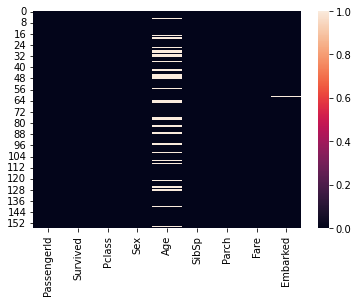

In [17]:
sb.heatmap(data_file.isnull())

In [18]:
data_file['Age'] = data_file['Age'].interpolate()
data_file.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [21]:
#dropa linha com valor nulo
data_file = data_file.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  155 non-null    int64  
 1   Survived     155 non-null    int64  
 2   Pclass       155 non-null    int64  
 3   Sex          155 non-null    object 
 4   Age          155 non-null    float64
 5   SibSp        155 non-null    int64  
 6   Parch        155 non-null    int64  
 7   Fare         155 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 12.1+ KB


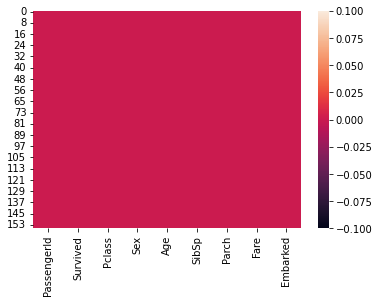

In [23]:
sb.heatmap(data_file.isnull())
data_file.info()

In [24]:
EmbarkedColumnDummy = pd.get_dummies(data_file['Embarked'])
SexColumnDummy = pd.get_dummies(data_file['Sex'])

In [25]:
data_file = pd.concat((data_file, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [26]:
data_file.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1
5,6,0,3,male,44.5,0,0,8.4583,Q,0,1,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,S,0,0,1,0,1
7,8,0,3,male,2.0,3,1,21.0750,S,0,0,1,0,1
8,9,1,3,female,27.0,0,2,11.1333,S,0,0,1,1,0
9,10,1,2,female,14.0,1,0,30.0708,C,1,0,0,1,0


In [27]:
data_file=data_file.drop(['Sex', 'Embarked'], axis=1)

In [28]:
data_file.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1
5,6,0,3,44.5,0,0,8.4583,0,1,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,0,1,0,1
7,8,0,3,2.0,3,1,21.0750,0,0,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1,1,0
9,10,1,2,14.0,1,0,30.0708,1,0,0,1,0


In [29]:
#Separar em x e y
x = data_file.values
y = data_file['Survived'].values

In [31]:
x = np.delete(x, 1 , axis=1)

In [33]:
x, y

(array([[  1.  ,   3.  ,  22.  , ...,   1.  ,   0.  ,   1.  ],
        [  2.  ,   1.  ,  38.  , ...,   0.  ,   1.  ,   0.  ],
        [  3.  ,   3.  ,  26.  , ...,   1.  ,   1.  ,   0.  ],
        ...,
        [154.  ,   3.  ,  40.5 , ...,   1.  ,   0.  ,   1.  ],
        [155.  ,   3.  ,  45.75, ...,   1.  ,   0.  ,   1.  ],
        [156.  ,   1.  ,  51.  , ...,   0.  ,   0.  ,   1.  ]]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0], dtype=int64))

In [65]:
print(type(x_test))
print(x_test.shape)

print(type(x[1]))
print(x[1])
print(x[1].shape)

new_x = [157, 3, 44, 1, 2, 11.21, 1, 0, 0, 1, 0]
new_x = np.array(new_x)
print(type(new_x))
print(new_x)
print(new_x.shape)

new_x = new_x.reshape(1, -1)
print(new_x.shape)

<class 'numpy.ndarray'>
(47, 11)
<class 'numpy.ndarray'>
[ 2.      1.     38.      1.      0.     71.2833  1.      0.      0.
  1.      0.    ]
(11,)
<class 'numpy.ndarray'>
[157.     3.    44.     1.     2.    11.21   1.     0.     0.     1.
   0.  ]
(11,)
(1, 11)


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#Split de 30% do dataset para teste
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# Decision Tree Classifier

In [37]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)
print('score test:',dt_clf.score(x_test, y_test))

y_pred = dt_clf.predict(x_test)

score test: 0.7872340425531915


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

'''
      ACTUAL VALUES
       +        -
P+     TP       FP
V-     FN       TN

array([[31,  4],
       [ 6,  6]], dtype=int64)

In [66]:
dt_clf.predict(new_x)

array([0], dtype=int64)

# Random Forest Classifier

In [61]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
print('score test:',rf_clf.score(x_test, y_test))

y_pred = rf_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

score test: 0.7872340425531915


array([[30,  5],
       [ 5,  7]], dtype=int64)

In [62]:
rf_clf.predict(new_x)

array([1], dtype=int64)

# Gradient Boosting Classifier

In [67]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
print('score test:',gb_clf.score(x_test, y_test))

y_pred = gb_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

score test: 0.723404255319149


array([[27,  8],
       [ 5,  7]], dtype=int64)

In [68]:
gb_clf.predict(new_x)

array([0], dtype=int64)

In [69]:
gb2_clf = ensemble.GradientBoostingClassifier(n_estimators=40)
gb2_clf.fit(x_train, y_train)
print('score test:',gb2_clf.score(x_test, y_test))

y_pred = gb2_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

score test: 0.7446808510638298


array([[28,  7],
       [ 5,  7]], dtype=int64)

In [70]:
gb2_clf.predict(new_x)

array([0], dtype=int64)

# Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
print('score test:',nb_clf.score(x_test, y_test))

y_pred = nb_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

score test: 0.7659574468085106


array([[28,  7],
       [ 4,  8]], dtype=int64)

In [73]:
nb_clf.predict(new_x)

array([1], dtype=int64)

# K-Nearest Neighbor Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
print('score test:',knn_clf.score(x_test, y_test))

y_pred = knn_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

score test: 0.574468085106383


array([[23, 12],
       [ 8,  4]], dtype=int64)

In [76]:
knn_clf.predict(new_x)

array([0], dtype=int64)

# Logistic Regression Classifier

In [83]:
'''from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
print('score test:',lr_clf.score(x_test, y_test))

y_pred = lr_clf.predict(x_test)
confusion_matrix(y_test, y_pred)'''

"from sklearn.linear_model import LogisticRegression\nlr_clf = LogisticRegression()\nlr_clf.fit(x_train, y_train)\nprint('score test:',lr_clf.score(x_test, y_test))\n\ny_pred = lr_clf.predict(x_test)\nconfusion_matrix(y_test, y_pred)"

In [84]:
lr_clf.predict(new_x)

array([1], dtype=int64)

# SVM Classifier - Support Vector Machine

In [82]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(x_train, y_train)
print('score test:',sv_clf.score(x_test, y_test))

y_pred = sv_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

score test: 0.723404255319149


array([[34,  1],
       [12,  0]], dtype=int64)